In [141]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

from models import * 
import torch.optim as optim

from sklearn import preprocessing

from Experiments import *

seed = 0 

def set_seeds(seed): 
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

set_seeds(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

%load_ext autoreload
%autoreload 2


cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
# dataset = "traffic"
# data_file = "traffic_data/data.csv"
# hier_file = "traffic_data/agg_mat.csv"
# data = pd.read_csv(data_file, index_col=0)
# agg_mat_df = pd.read_csv(hier_file, index_col=0)

dataset = 'labor'
data_file = "labor/data.csv"
hier_file = "labor/agg_mat.csv"

data = pd.read_csv(data_file, index_col=0)
agg_mat_df = pd.read_csv(hier_file, index_col=0)
base_agg_mat = agg_mat_df.values

In [143]:
maximum = np.max(data.values)
data = (data / maximum).values

In [144]:
batch_size = data.shape[0]
context_window = 1
train_split = 0.8
val_split = 0.1
hidden_dim = 5

num_runs = 10
n_epochs = 500

In [145]:
# params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
#           'coherency_loss':True, 'profhit':False, 'coherency_weight':weight, 'project':False}
# coherency_results, names, losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)

In [155]:
# Coherency loss

# coherency_params = np.exp(-np.arange(0, 0.2, 0.02))
coherency_params = np.arange(0, 0.1, 0.01)
print(coherency_params)
all_coherency_results = []
all_losses = []
for weight in coherency_params:
    seed = 42
    torch.manual_seed(seed)       # For CPU and CUDA (if available)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    np.random.seed(seed)          # NumPy
    random.seed(seed)             # Python's random module
    os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations
    
    params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':64, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
              'coherency_loss':True, 'profhit':False, 'coherency_weight':weight, 'project':False}
    coherency_results, names, losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)
    all_losses.append(losses)
    all_coherency_results.append(coherency_results)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
run 0


100%|██████████| 500/500 [00:02<00:00, 174.38it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 227.69it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 171.30it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 172.18it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 169.37it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 172.20it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 171.72it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 167.01it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 170.88it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 170.65it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 172.27it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 167.48it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 171.83it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 169.56it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 172.05it/s]


run 5


100%|██████████| 500/500 [00:03<00:00, 165.53it/s]


run 6


100%|██████████| 500/500 [00:03<00:00, 164.23it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 171.18it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 172.96it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 170.72it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 171.85it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 167.32it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 172.70it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 171.41it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 170.38it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 168.90it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 171.16it/s]


run 7


100%|██████████| 500/500 [00:03<00:00, 165.67it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 166.76it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 167.40it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 171.41it/s]


run 1


100%|██████████| 500/500 [00:03<00:00, 166.27it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 171.16it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 169.77it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 177.16it/s]


run 5


100%|██████████| 500/500 [00:01<00:00, 296.98it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 249.92it/s]


run 7


100%|██████████| 500/500 [00:01<00:00, 325.37it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 198.02it/s]


run 9


100%|██████████| 500/500 [00:03<00:00, 158.58it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 169.97it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 172.54it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 172.41it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 170.10it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 171.55it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 189.66it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 209.39it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 172.63it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 172.31it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 169.44it/s]


run 0


100%|██████████| 500/500 [00:03<00:00, 166.60it/s]


run 1


100%|██████████| 500/500 [00:03<00:00, 143.40it/s]


run 2


100%|██████████| 500/500 [00:03<00:00, 149.03it/s]


run 3


100%|██████████| 500/500 [00:03<00:00, 146.22it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 171.14it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 169.73it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 172.06it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 171.18it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 170.67it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 169.39it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 172.46it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 170.49it/s]


run 2


100%|██████████| 500/500 [00:03<00:00, 165.77it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 169.52it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 170.33it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 169.77it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 172.20it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 169.46it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 166.86it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 170.07it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 172.71it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 172.94it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 171.08it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 173.03it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 170.23it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 173.89it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 170.38it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 172.26it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 170.64it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 170.05it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 170.68it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 173.33it/s]


run 2


100%|██████████| 500/500 [00:03<00:00, 163.76it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 168.03it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 172.27it/s]


run 5


100%|██████████| 500/500 [00:03<00:00, 164.71it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 170.61it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 171.58it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 171.82it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 173.98it/s]


run 0


100%|██████████| 500/500 [00:02<00:00, 172.24it/s]


run 1


100%|██████████| 500/500 [00:02<00:00, 172.80it/s]


run 2


100%|██████████| 500/500 [00:02<00:00, 169.94it/s]


run 3


100%|██████████| 500/500 [00:02<00:00, 172.77it/s]


run 4


100%|██████████| 500/500 [00:02<00:00, 172.69it/s]


run 5


100%|██████████| 500/500 [00:02<00:00, 173.28it/s]


run 6


100%|██████████| 500/500 [00:02<00:00, 173.89it/s]


run 7


100%|██████████| 500/500 [00:02<00:00, 171.42it/s]


run 8


100%|██████████| 500/500 [00:02<00:00, 167.47it/s]


run 9


100%|██████████| 500/500 [00:02<00:00, 169.03it/s]


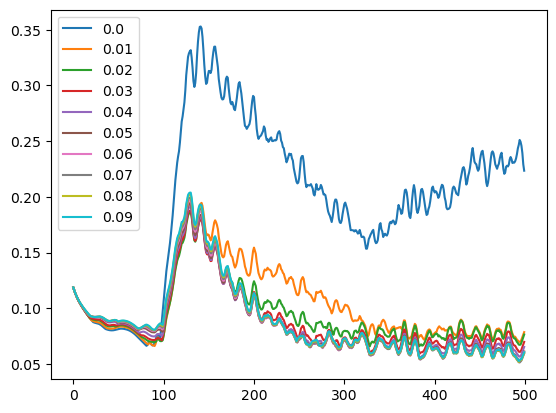

In [156]:
for w, w_losses in zip(coherency_params, all_losses):
    val_losses = np.array([losses[-1] for losses in w_losses])
    avg_val_loss = np.max(val_losses, axis=0)
    plt.plot(avg_val_loss, label=w)
plt.legend()

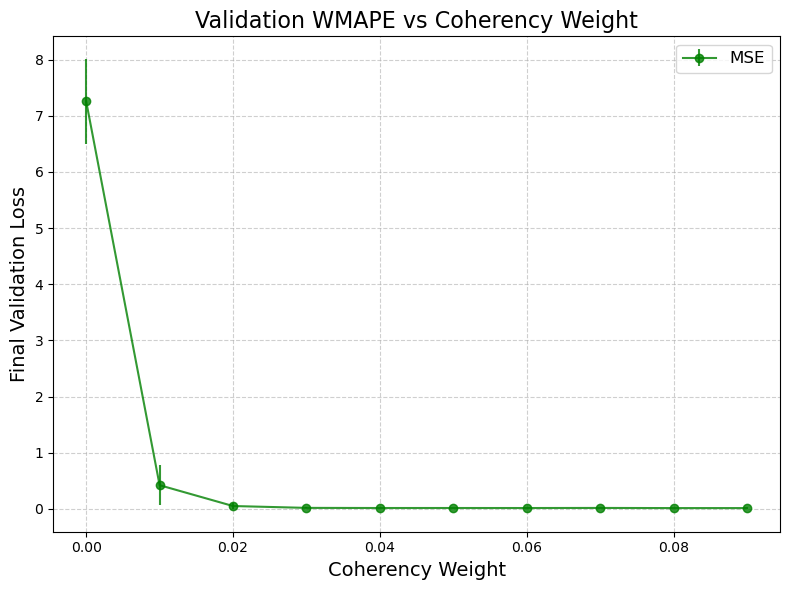

In [190]:
final_losses = []
final_std = []
for w, w_losses in zip(coherency_params, all_losses):
    val_losses = np.array([np.mean(losses[1][-100:]) for losses in w_losses])
    avg_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)
    final_losses.append(avg_val_loss)
    final_std.append(std_val_loss)
# plt.errorbar(coherency_params, final_losses, final_std)
# plt.plot(coherency_params, final_losses)

# Enhanced plot aesthetics
plt.figure(figsize=(8, 6))
s = 0
plt.errorbar(coherency_params[s:], final_losses[s:], final_std[s:], marker='o', linestyle='-', label='MSE', color='green', alpha=0.8)
plt.title('Validation WMAPE vs Coherency Weight', fontsize=16)
plt.xlabel('Coherency Weight', fontsize=14)
plt.ylabel('Final Validation Loss', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.show()
# plt.savefig('results/coherency_param.png')


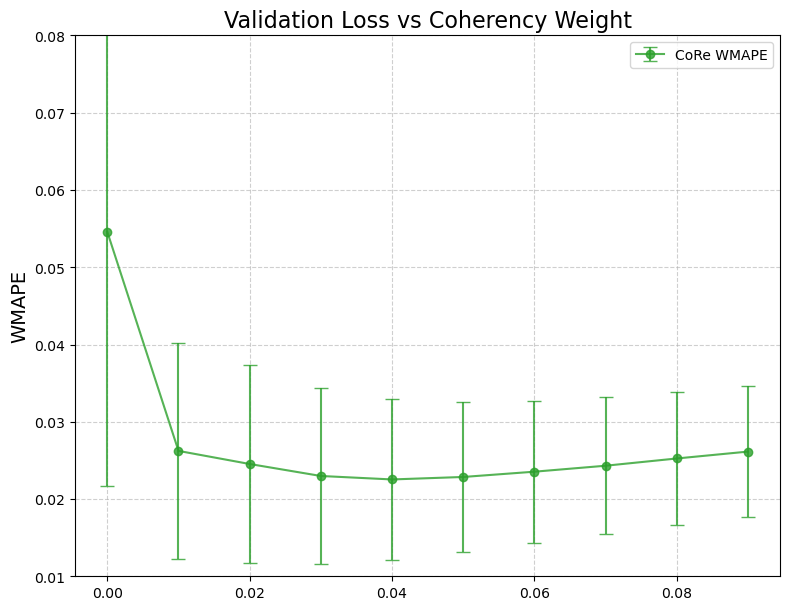

In [215]:
# First set of calculations (MSE)
final_losses_1 = []
final_std_1 = []
for w, w_losses in zip(coherency_params, all_losses):
    val_losses = np.array([np.mean(losses[1][-100:]) for losses in w_losses])
    avg_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)
    final_losses_1.append(avg_val_loss)
    final_std_1.append(std_val_loss)

# Second set of calculations (WMAPE)
final_losses_2 = []
final_std_2 = []
for w, w_losses in zip(coherency_params, all_losses):
    val_losses = np.array([np.mean(losses[2][-100:]) for losses in w_losses])
    avg_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)
    final_losses_2.append(avg_val_loss)
    final_std_2.append(std_val_loss/2)
    
fig, ax1 = plt.subplots(figsize=(8, 6))

# # Plot MSE on the first y-axis
# color = 'tab:blue'
# ax1.set_xlabel('Coherency Weight', fontsize=14)
# ax1.set_ylabel('MSE', color=color, fontsize=14)
# s = 0
# ax1.errorbar(coherency_params[s:], final_losses_1[s:], final_std_1[s:], marker='o', linestyle='-', label='MSE', color=color, alpha=0.8)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim(0.01, 0.1)
# Plot WMAPE on the second y-axis
ax2 = ax1  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('WMAPE', fontsize=14)  # we already handled the x-label with ax1
ax2.errorbar(coherency_params, final_losses_2, final_std_2, capsize=5, marker='o', linestyle='-', label='CoRe WMAPE', color=color, alpha=0.8)
ax2.tick_params(axis='y')#, labelcolor=color)
ax2.set_ylim(0.01, 0.08)
ax2.legend()
# Final adjustments
fig.tight_layout()  # ensure proper layout
plt.title('Validation Loss vs Coherency Weight', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()
plt.savefig('results/coherency_param.png')


/tmp/ipykernel_3463/1225732310.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


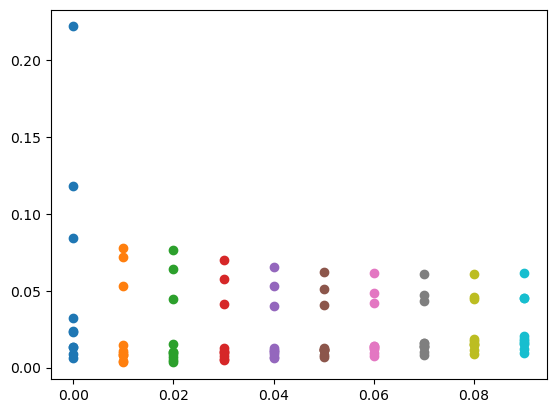

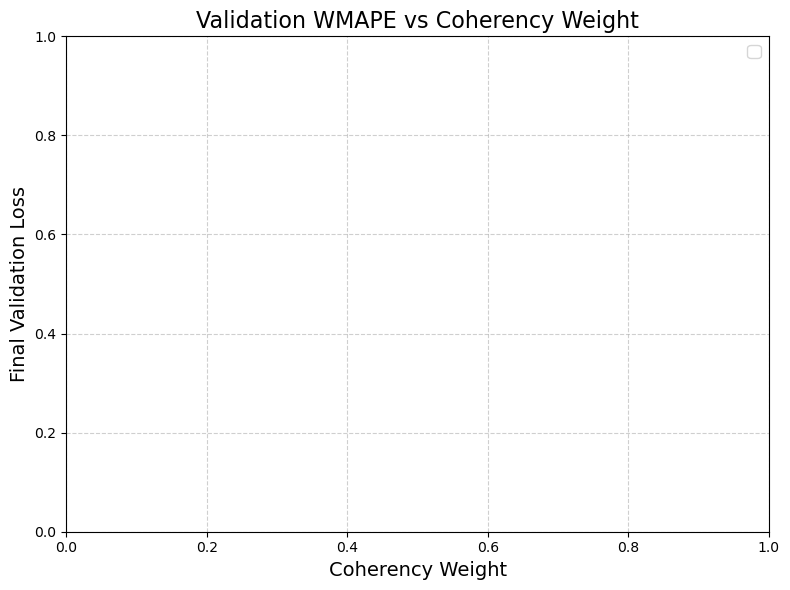

In [180]:
final_losses = []
final_std = []
for w, w_losses in zip(coherency_params, all_losses):
    val_losses = np.array([np.mean(losses[2][-100:]) for losses in w_losses])
    avg_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)
    final_losses.append(avg_val_loss)
    final_std.append(std_val_loss)
    
    plt.scatter(np.ones(len(val_losses)) * w, val_losses)
# plt.errorbar(coherency_params, final_losses, final_std)
# plt.plot(coherency_params, final_losses)

# Enhanced plot aesthetics
plt.figure(figsize=(8, 6))
# plt.errorbar(coherency_params, final_losses, final_std, marker='o', linestyle='-', label='Validation Loss', color='green', alpha=0.8)
# plt.plot(coherency_params, final_losses, marker='o', linestyle='-', label='Validation Loss', color='green', alpha=0.8)
plt.title('Validation WMAPE vs Coherency Weight', fontsize=16)
plt.xlabel('Coherency Weight', fontsize=14)
plt.ylabel('Final Validation Loss', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.show()
# plt.savefig('results/coherency_param.png')


losses

In [225]:
import numpy as np

# Data from the table
data = {
    "Base": [(0.0053, 15.8160), (0.0226, 0.5279), (0.0616, 0.4013), (0.0997, 0.2586)],
    "CoRe (Ours)": [(0.0167, 19.1570), (0.0147, 0.3296), (0.0311, 0.2576), (0.1102, 0.2484)],
    "PROFHiT": [(0.0412, 45.7371), (0.0187, 0.5084), (0.0275, 0.3544), (0.1255, 0.3712)],
    "Projection": [(0.0050, 15.5177), (0.0156, 0.5069), (0.0516, 0.4515), (0.1990, 0.4432)]
}

print("Base       :", np.array(data['Base']).mean(axis=0))
print("CoRe (Ours):", np.array(data['CoRe (Ours)']).mean(axis=0))
print("PROFHiT    :", np.array(data['PROFHiT']).mean(axis=0))
print("Projection :", np.array(data['Projection']).mean(axis=0))

Base       : [0.0473  4.25095]
CoRe (Ours): [0.043175 4.99815 ]
PROFHiT    : [ 0.053225 11.742775]
Projection : [0.0678   4.229825]


In [226]:
data = {
    "Base": [(0.0053, 2.5026), (0.0059, 0.9327), (0.0076, 0.5429), (0.1263, 0.3392)],
    "CoRe (Ours)": [(0.0010, 1.0988), (0.0016, 0.5072), (0.0042, 0.4210), (0.1118, 0.3510)],
    "PROFHiT": [(0.0021, 1.5435), (0.0025, 0.6193), (0.0048, 0.4332), (0.1158, 0.3310)],
    "Projection": [(0.0033, 1.9587), (0.0031, 0.6910), (0.0058, 0.4941), (0.1190, 0.3408)]
}

print("Base       :", np.array(data['Base']).mean(axis=0))
print("CoRe (Ours):", np.array(data['CoRe (Ours)']).mean(axis=0))
print("PROFHiT    :", np.array(data['PROFHiT']).mean(axis=0))
print("Projection :", np.array(data['Projection']).mean(axis=0))

Base       : [0.036275 1.07935 ]
CoRe (Ours): [0.02965 0.5945 ]
PROFHiT    : [0.0313  0.73175]
Projection : [0.0328  0.87115]
